In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
import plotly.express as px
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from matplotlib import pyplot as plt
from catboost import CatBoostClassifier
from sklearn import metrics
from joblib import dump

# We set max column and rows
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999


In [2]:
query = """
    SELECT * FROM churn_status;
"""

In [3]:
import pandas as pd
from sqlalchemy import create_engine

ENDPOINT = 'heicoders-playground.c2ced10ceyki.ap-southeast-1.rds.amazonaws.com'
PORT = 3306
USERNAME = 'student300'
PASSWORD = 'heicoders_AI300'
DBNAME = 'ai300_capstone'

database_conn = create_engine(f'mysql+pymysql://{USERNAME}:{PASSWORD}@{ENDPOINT}/{DBNAME}')

df = pd.read_sql(query, database_conn)
df

,customer_id,status,churn_label,churn_category,churn_reason
0,0002-ORFBO,Stayed,No,,
1,0003-MKNFE,Stayed,No,,
2,0004-TLHLJ,Churned,Yes,Competitor,Competitor had better devices
3,0011-IGKFF,Churned,Yes,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Churned,Yes,Dissatisfaction,Network reliability
...,...,...,...,...,...
7038,9987-LUTYD,Stayed,No,,
7039,9992-RRAMN,Churned,Yes,Dissatisfaction,Product dissatisfaction
7040,9992-UJOEL,Joined,No,,
7041,9993-LHIEB,Stayed,No,,


In [4]:
another_query = """
    SELECT cs.customer_id, cs.churn_label, id.*, acc.*, ac_use.*, c.area_id, c.city
FROM churn_status AS cs
LEFT JOIN customer AS id
ON cs.customer_id = id.customer_id
LEFT JOIN account AS acc
ON cs.customer_id = acc.customer_id
LEFT JOIN account_usage AS ac_use
ON acc.account_id = ac_use.account_id
LEFT JOIN city AS c
ON id.zip_code = c.zip_code
WHERE churn_label IN ('Yes','No');
"""
df = pd.read_sql(another_query, database_conn)
df

,customer_id,churn_label,customer_id,gender,age,senior_citizen,married,num_dependents,zip_code,account_id,customer_id,tenure_months,num_referrals,has_internet_service,internet_type,has_unlimited_data,has_phone_service,has_multiple_lines,has_premium_tech_support,has_online_security,has_online_backup,has_device_protection,contract_type,paperless_billing,payment_method,account_id,avg_long_distance_fee_monthly,total_long_distance_fee,avg_gb_download_monthly,stream_tv,stream_movie,stream_music,total_monthly_fee,total_charges_quarter,total_refunds,area_id,city
0,0013-EXCHZ,Yes,0013-EXCHZ,Female,75,Yes,Yes,0,93010,BFIN-DLMOA,0013-EXCHZ,3,3,Yes,Fiber Optic,Yes,Yes,No,Yes,No,No,No,Month-to-Month,Yes,Credit Card,BFIN-DLMOA,7.38,22.14,11,Yes,No,No,83.90,267.40,0.00,607,Camarillo
1,0014-BMAQU,No,0014-BMAQU,Male,52,No,Yes,0,94558,AFEO-XOOCP,0014-BMAQU,63,8,Yes,Fiber Optic,No,Yes,Yes,Yes,Yes,No,No,Two Year,Yes,Credit Card,AFEO-XOOCP,12.96,816.48,7,No,No,No,84.65,5377.80,0.00,963,Napa
2,0016-QLJIS,No,0016-QLJIS,Female,43,No,Yes,1,95681,DEMQ-MFXWC,0016-QLJIS,65,3,Yes,Cable,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Two Year,Yes,Credit Card,DEMQ-MFXWC,28.46,1849.90,14,Yes,Yes,Yes,90.45,5957.90,0.00,1390,Sheridan
3,0019-EFAEP,No,0019-EFAEP,Female,32,No,No,0,91942,AIPP-VTDXJ,0019-EFAEP,72,0,Yes,Fiber Optic,Yes,Yes,Yes,No,Yes,Yes,Yes,Two Year,Yes,Bank Withdrawal,AIPP-VTDXJ,2.25,162.00,16,Yes,No,No,101.30,7261.25,0.00,303,La Mesa
4,0019-GFNTW,No,0019-GFNTW,Female,39,No,No,0,93441,CJHA-SRKIB,0019-GFNTW,56,0,Yes,DSL,Yes,No,No,Yes,Yes,Yes,Yes,Two Year,No,Bank Withdrawal,CJHA-SRKIB,0.00,0.00,19,No,No,No,45.05,2560.10,0.00,716,Los Olivos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6986,9848-JQJTX,No,9848-JQJTX,Male,52,No,No,0,90291,ZTCJ-AYASC,9848-JQJTX,72,0,Yes,Fiber Optic,Yes,Yes,Yes,No,No,Yes,Yes,Two Year,Yes,Bank Withdrawal,ZTCJ-AYASC,24.53,1766.16,12,Yes,Yes,Yes,100.90,7459.05,0.00,94,Venice
6987,9921-ZVRHG,Yes,9921-ZVRHG,Female,44,No,No,0,93673,WKQW-QPWUM,9921-ZVRHG,14,0,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,WKQW-QPWUM,1.19,16.66,23,No,No,No,80.45,1072.00,0.00,819,Traver
6988,9938-TKDGL,No,9938-TKDGL,Male,38,No,Yes,3,93544,VKPX-MVNBC,9938-TKDGL,68,9,Yes,Fiber Optic,Yes,Yes,No,Yes,Yes,No,No,Two Year,Yes,Bank Withdrawal,VKPX-MVNBC,38.75,2635.00,28,Yes,Yes,Yes,99.55,6668.00,0.00,755,Llano
6989,9938-ZREHM,No,9938-ZREHM,Female,41,No,Yes,0,93033,PQGJ-VYMBE,9938-ZREHM,37,4,Yes,DSL,Yes,Yes,Yes,Yes,No,Yes,No,One Year,No,Credit Card,PQGJ-VYMBE,42.45,1570.65,23,No,Yes,Yes,72.10,2658.40,16.36,615,Oxnard


In [5]:
fig = px.bar(df['churn_label'].value_counts(), width=800, height=500)
fig.show()

In [6]:
corr = df.corr(numeric_only=True)
fig = px.imshow(corr)
fig.update_xaxes(side="top")
fig.show()

In [7]:
# Create a histogram using Plotly Express
fig = px.histogram(df['tenure_months'], title='tenure_months distribution')

# Show the plot
fig.show()

# Create a histogram using Plotly Express
fig = px.histogram(df['total_monthly_fee'], title='total_monthly_fee distribution')

# Show the plot
fig.show()

# Create a histogram using Plotly Express
fig = px.histogram(df['total_charges_quarter'], title='total_charges_quarter distribution')

# Show the plot
fig.show()

In [8]:
# create a copy to modify
df_transformed = df.copy()

# dropping from df_transformed columns that are not critical to the ML model

# Assuming df is your DataFrame and columns_to_drop is a list of column names you want to drop
columns_to_drop = ['customer_id', 'account_id']

# Drop the specified columns
df_transformed = df.drop(columns=columns_to_drop, axis='columns')
df_transformed.head()


,churn_label,gender,age,senior_citizen,married,num_dependents,zip_code,tenure_months,num_referrals,has_internet_service,internet_type,has_unlimited_data,has_phone_service,has_multiple_lines,has_premium_tech_support,has_online_security,has_online_backup,has_device_protection,contract_type,paperless_billing,payment_method,avg_long_distance_fee_monthly,total_long_distance_fee,avg_gb_download_monthly,stream_tv,stream_movie,stream_music,total_monthly_fee,total_charges_quarter,total_refunds,area_id,city
0,Yes,Female,75,Yes,Yes,0,93010,3,3,Yes,Fiber Optic,Yes,Yes,No,Yes,No,No,No,Month-to-Month,Yes,Credit Card,7.38,22.14,11,Yes,No,No,83.90,267.40,0.0,607,Camarillo
1,No,Male,52,No,Yes,0,94558,63,8,Yes,Fiber Optic,No,Yes,Yes,Yes,Yes,No,No,Two Year,Yes,Credit Card,12.96,816.48,7,No,No,No,84.65,5377.80,0.0,963,Napa
2,No,Female,43,No,Yes,1,95681,65,3,Yes,Cable,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Two Year,Yes,Credit Card,28.46,1849.90,14,Yes,Yes,Yes,90.45,5957.90,0.0,1390,Sheridan
3,No,Female,32,No,No,0,91942,72,0,Yes,Fiber Optic,Yes,Yes,Yes,No,Yes,Yes,Yes,Two Year,Yes,Bank Withdrawal,2.25,162.00,16,Yes,No,No,101.30,7261.25,0.0,303,La Mesa
4,No,Female,39,No,No,0,93441,56,0,Yes,DSL,Yes,No,No,Yes,Yes,Yes,Yes,Two Year,No,Bank Withdrawal,0.00,0.00,19,No,No,No,45.05,2560.10,0.0,716,Los Olivos


In [9]:
df_transformed.info()
df_transformed.dtypes.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6991 entries, 0 to 6990
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   churn_label                    6991 non-null   object 
 1   gender                         6991 non-null   object 
 2   age                            6991 non-null   int64  
 3   senior_citizen                 6991 non-null   object 
 4   married                        6991 non-null   object 
 5   num_dependents                 6991 non-null   int64  
 6   zip_code                       6991 non-null   int64  
 7   tenure_months                  6991 non-null   int64  
 8   num_referrals                  6991 non-null   int64  
 9   has_internet_service           6991 non-null   object 
 10  internet_type                  6991 non-null   object 
 11  has_unlimited_data             6991 non-null   object 
 12  has_phone_service              6991 non-null   o

object     20
int64       7
float64     5
Name: count, dtype: int64

In [10]:
# label encoding (binary variables)
label_encoding_columns = ['churn_label', 'gender', 'has_internet_service', 'has_unlimited_data', 'has_phone_service', 'has_multiple_lines', 'has_premium_tech_support','has_online_security', 'has_online_backup', 'has_device_protection', 'paperless_billing', 'stream_tv', 'stream_movie', 'stream_music', 'senior_citizen', 'married']

# encode categorical binary features using label encoding
for column in label_encoding_columns:
    if column == 'gender':
        df_transformed[column] = df_transformed[column].map({'Female': 1, 'Male': 0})
    else: 
        df_transformed[column] = df_transformed[column].map({'Yes': 1, 'No': 0}) 


In [11]:
# Define the contract type mapper
contract_type_mapper = {'Month-to-Month': 1, 'One Year': 12, 'Two Year': 24}

# Replace contract_type with numerical values
df_transformed['contract_type'] = df_transformed['contract_type'].replace(contract_type_mapper)

df_transformed.head()

,churn_label,gender,age,senior_citizen,married,num_dependents,zip_code,tenure_months,num_referrals,has_internet_service,internet_type,has_unlimited_data,has_phone_service,has_multiple_lines,has_premium_tech_support,has_online_security,has_online_backup,has_device_protection,contract_type,paperless_billing,payment_method,avg_long_distance_fee_monthly,total_long_distance_fee,avg_gb_download_monthly,stream_tv,stream_movie,stream_music,total_monthly_fee,total_charges_quarter,total_refunds,area_id,city
0,1,1,75,1,1,0,93010,3,3,1,Fiber Optic,1,1,0,1,0,0,0,1,1,Credit Card,7.38,22.14,11,1,0,0,83.90,267.40,0.0,607,Camarillo
1,0,0,52,0,1,0,94558,63,8,1,Fiber Optic,0,1,1,1,1,0,0,24,1,Credit Card,12.96,816.48,7,0,0,0,84.65,5377.80,0.0,963,Napa
2,0,1,43,0,1,1,95681,65,3,1,Cable,1,1,1,1,1,1,1,24,1,Credit Card,28.46,1849.90,14,1,1,1,90.45,5957.90,0.0,1390,Sheridan
3,0,1,32,0,0,0,91942,72,0,1,Fiber Optic,1,1,1,0,1,1,1,24,1,Bank Withdrawal,2.25,162.00,16,1,0,0,101.30,7261.25,0.0,303,La Mesa
4,0,1,39,0,0,0,93441,56,0,1,DSL,1,0,0,1,1,1,1,24,0,Bank Withdrawal,0.00,0.00,19,0,0,0,45.05,2560.10,0.0,716,Los Olivos


In [12]:
# one-hot encoding (categorical variables with more than two levels)
one_hot_encoding_columns = ['internet_type', 'payment_method']

# Create an instance of OneHotEncoder
encoder = OneHotEncoder(drop='first', dtype=int)

# Fit and transform the specified columns
encoded_data = encoder.fit_transform(df_transformed[one_hot_encoding_columns])

# Get the feature names for the encoded columns
encoded_column_names = encoder.get_feature_names_out(input_features=one_hot_encoding_columns)

# Create a DataFrame from the encoded data
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoded_column_names)

# Concatenate the encoded DataFrame with the original DataFrame
df_transformed = pd.concat([df_transformed.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

# Drop the original columns that were one-hot encoded
df_transformed.drop(one_hot_encoding_columns, axis=1, inplace=True)

# Replace blanks in feature names with '_'
df_transformed.columns = [col.replace(' ', '_') for col in df_transformed.columns]

In [13]:
# # min-max normalization (numeric variables)
# min_max_columns = ['tenure_months', 'total_monthly_fee', 'total_charges_quarter']

# # scale numerical variables using min max scaler
# scaler = MinMaxScaler()

# df_transformed[min_max_columns] = scaler.fit_transform(df_transformed[min_max_columns])

# # Save the transformed DataFrame to a .pkl file
# file_path = '../model/minmax.pkl'
# dump(scaler, file_path)

In [14]:
df_transformed.columns

Index(['churn_label', 'gender', 'age', 'senior_citizen', 'married',
       'num_dependents', 'zip_code', 'tenure_months', 'num_referrals',
       'has_internet_service', 'has_unlimited_data', 'has_phone_service',
       'has_multiple_lines', 'has_premium_tech_support', 'has_online_security',
       'has_online_backup', 'has_device_protection', 'contract_type',
       'paperless_billing', 'avg_long_distance_fee_monthly',
       'total_long_distance_fee', 'avg_gb_download_monthly', 'stream_tv',
       'stream_movie', 'stream_music', 'total_monthly_fee',
       'total_charges_quarter', 'total_refunds', 'area_id', 'city',
       'internet_type_DSL', 'internet_type_Fiber_Optic', 'internet_type_None',
       'payment_method_Credit_Card', 'payment_method_Mailed_Check'],
      dtype='object')

In [15]:
df_transformed.head()

,churn_label,gender,age,senior_citizen,married,num_dependents,zip_code,tenure_months,num_referrals,has_internet_service,has_unlimited_data,has_phone_service,has_multiple_lines,has_premium_tech_support,has_online_security,has_online_backup,has_device_protection,contract_type,paperless_billing,avg_long_distance_fee_monthly,total_long_distance_fee,avg_gb_download_monthly,stream_tv,stream_movie,stream_music,total_monthly_fee,total_charges_quarter,total_refunds,area_id,city,internet_type_DSL,internet_type_Fiber_Optic,internet_type_None,payment_method_Credit_Card,payment_method_Mailed_Check
0,1,1,75,1,1,0,93010,3,3,1,1,1,0,1,0,0,0,1,1,7.38,22.14,11,1,0,0,83.90,267.40,0.0,607,Camarillo,0,1,0,1,0
1,0,0,52,0,1,0,94558,63,8,1,0,1,1,1,1,0,0,24,1,12.96,816.48,7,0,0,0,84.65,5377.80,0.0,963,Napa,0,1,0,1,0
2,0,1,43,0,1,1,95681,65,3,1,1,1,1,1,1,1,1,24,1,28.46,1849.90,14,1,1,1,90.45,5957.90,0.0,1390,Sheridan,0,0,0,1,0
3,0,1,32,0,0,0,91942,72,0,1,1,1,1,0,1,1,1,24,1,2.25,162.00,16,1,0,0,101.30,7261.25,0.0,303,La Mesa,0,1,0,0,0
4,0,1,39,0,0,0,93441,56,0,1,1,0,0,1,1,1,1,24,0,0.00,0.00,19,0,0,0,45.05,2560.10,0.0,716,Los Olivos,1,0,0,0,0


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
# Split the transformed data into features and target variable
X = df_transformed.drop(['churn_label','city'], axis=1)
y = df_transformed['churn_label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# XGBoost
import xgboost as xgb

# Create an XGBoost model
model = xgb.XGBClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred)
print("XGBoost AUC Score:", auc_score)


XGBoost AUC Score: 0.8003034791428525


In [18]:
# CatBoost
from catboost import CatBoostClassifier
# Create a CatBoost model
categorical_cols = ['gender', 'has_internet_service', 'has_unlimited_data', 'has_phone_service', 
                    'has_multiple_lines', 'has_premium_tech_support','has_online_security', 
                    'has_online_backup', 'has_device_protection', 'paperless_billing', 'stream_tv', 
                    'stream_movie', 'stream_music', 'senior_citizen', 'married', 'internet_type_DSL', 
                    'internet_type_Fiber_Optic','internet_type_None', 'contract_type',
                    'payment_method_Credit_Card','payment_method_Mailed_Check']

model = CatBoostClassifier(verbose=False, random_state=42)

# Train the model
model.fit(X_train, y_train, cat_features=categorical_cols)

# Make predictions
y_pred1 = model.predict(X_test)

# Make predictions on the test set
y_pred = model.predict_proba(X_test)[:, 1]

# Calculate the AUC score
auc_score1 = roc_auc_score(y_test, y_pred1)
print("CatBoost AUC predict Score:", auc_score1)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred)
print("CatBoost AUC predict_proba Score:", auc_score)

CatBoost AUC predict Score: 0.8251399331326239
CatBoost AUC predict_proba Score: 0.9326630496031427


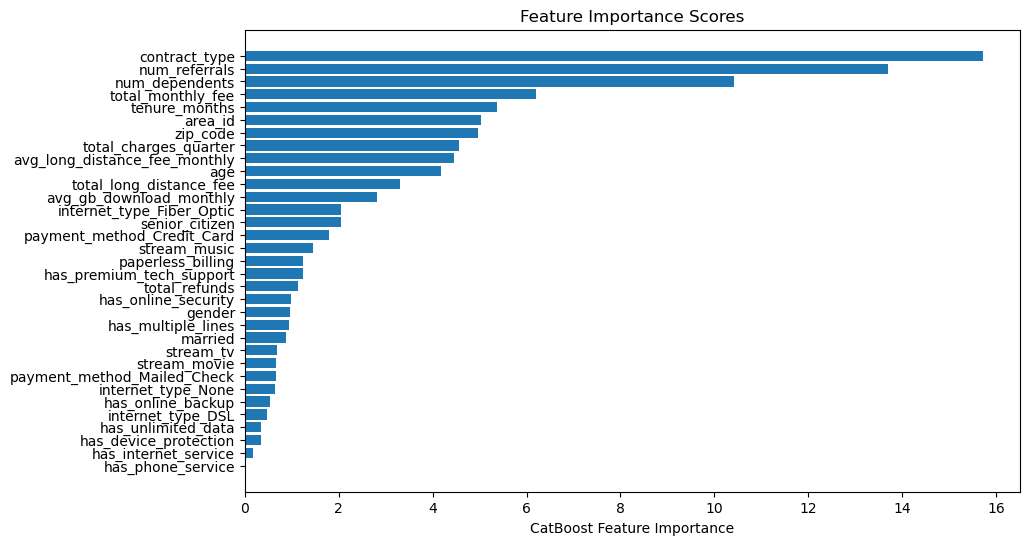

In [19]:
# Extract feature importances
feature_importances = model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel("CatBoost Feature Importance")
plt.title("Feature Importance Scores")
plt.gca().invert_yaxis()  # Invert y axis to have the highest importance at the top
plt.show()

In [20]:
# Select the best performing model and input to estimators for RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV

# define the parameter grid
grid_parameters = {
    'iterations': [100, 200, 300, 400, 500, 1000],
    'learning_rate': [0.01, 0.03, 0.1, 0.2, 0.3],
    'depth': [4, 6, 8, 10],
    'l2_leaf_reg': [1, 3, 5, 7, 9],
    'bagging_temperature': [0.1, 0.2, 0.5, 1, 2, 3],
    'random_strength': [0.1, 0.5, 1, 1.5, 2],
    'border_count': [32, 64, 128, 254],
    'colsample_bylevel': [0.5, 0.7, 0.9, 1.0]
 }

catboost_model = CatBoostClassifier(verbose=False, random_state=42)

# define the RandomizedSearchCV class for trying different parameter combinations
random_search = RandomizedSearchCV(estimator=catboost_model,
                                   param_distributions=grid_parameters,
                                   cv=5,
                                   n_iter=50,
                                   n_jobs=-1)

# fitting the model for random search 
categorical_cols = ['gender', 'has_internet_service', 'has_unlimited_data', 'has_phone_service', 
                    'has_multiple_lines', 'has_premium_tech_support','has_online_security', 
                    'has_online_backup', 'has_device_protection', 'paperless_billing', 'stream_tv', 
                    'stream_movie', 'stream_music', 'senior_citizen', 'married', 'internet_type_DSL', 
                    'internet_type_Fiber_Optic','internet_type_None',
                    'contract_type', 'payment_method_Credit_Card','payment_method_Mailed_Check']

random_search.fit(X_train, y_train, cat_features=categorical_cols)

# print best parameter after tuning
print(random_search.best_params_)

{'random_strength': 0.5, 'learning_rate': 0.03, 'l2_leaf_reg': 9, 'iterations': 500, 'depth': 6, 'colsample_bylevel': 0.9, 'border_count': 128, 'bagging_temperature': 0.5}


In [21]:
# make the predictions
random_search_predictions = random_search.predict_proba(X_test)[:, 1]

In [22]:
# print the auc score of the model after hyparameter tuning 
final_model_score = roc_auc_score(y_test, random_search_predictions)
print(f"The final model score is {final_model_score}")

The final model score is 0.9322820236236108


In [23]:
# After the best ML model has been chosen, we fit our entire dataset.
from sklearn.model_selection import cross_val_predict

# Split data into predictors X and output Y
X = df_transformed.drop(['churn_label','city'], axis=1)
y = df_transformed['churn_label']

# Initialize a CatBoost Classifier
catboost_model = CatBoostClassifier(random_strength= 0.5, learning_rate= 0.03, l2_leaf_reg= 3, iterations= 400, depth= 6, colsample_bylevel= 0.7, border_count= 128, bagging_temperature= 2, verbose=False, random_state=42)

# Fit the model on the training data
categorical_cols = ['gender', 'has_internet_service', 'has_unlimited_data', 'has_phone_service', 
                    'has_multiple_lines', 'has_premium_tech_support','has_online_security', 
                    'has_online_backup', 'has_device_protection', 'paperless_billing', 'stream_tv', 
                    'stream_movie', 'stream_music', 'senior_citizen', 'married', 'internet_type_DSL', 
                    'internet_type_Fiber_Optic','internet_type_None',
                    'contract_type', 'payment_method_Credit_Card','payment_method_Mailed_Check']

catboost_model.fit(X, y, cat_features=categorical_cols)

# Make predictions using cross-validation
y_pred_proba = cross_val_predict(catboost_model, X, y, cv=10, verbose=False, method='predict_proba')[:, 1]

# Calculate the AUC score using cross-validation predictions
auc_score = roc_auc_score(y, y_pred_proba)
print("CatBoost AUC Score (cross-validated):", auc_score)

CatBoost AUC Score (cross-validated): 0.9189070112426575


In [24]:
# we drop the area_id as both -zipcode- are similar and it is easier to get the customer to write down their zipcode.
# paperless billing was included as customers will be able to know better. and it is in front of other opeions like internet type and payment method. Easier to execute
top_10_features = ['num_referrals','contract_type','num_dependents','tenure_months',
                   'total_monthly_fee','age','zip_code', 'paperless_billing',
                  'avg_long_distance_fee_monthly','total_charges_quarter']
            


In [25]:
# Calculate AUC score using only the top10 features

from sklearn.model_selection import cross_val_predict

# Split data into predictors X and output Y
X = df_transformed[top_10_features]
y = df_transformed['churn_label']

# Initialize a CatBoost Classifier
catboost_model = CatBoostClassifier(random_strength= 0.5, learning_rate= 0.03, l2_leaf_reg= 3, iterations= 400, depth= 6, colsample_bylevel= 0.7, border_count= 128, bagging_temperature= 2, verbose=False, random_state=42)

# Fit the model on the training data
categorical_cols = ['contract_type']
catboost_model.fit(X, y, cat_features=categorical_cols)

# Make predictions using cross-validation
y_pred_proba = cross_val_predict(catboost_model, X, y, cv=10, verbose=False, method='predict_proba')[:, 1]

# Calculate the AUC score using cross-validation predictions
auc_score = roc_auc_score(y, y_pred_proba)
print("CatBoost AUC Score (cross-validated):", auc_score)

CatBoost AUC Score (cross-validated): 0.911086166193569


In [26]:
# Export the trained model to a .pkl file
dump(catboost_model, '../model/catboost_model.pkl')

['../model/catboost_model.pkl']